In [1]:
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import os
import prepare
import acquire
import prepare
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns

import matplotlib.pyplot as plt

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [2]:
iris_df = acquire.get_iris_data()
iris_df = iris_df.drop(iris_df.columns[0:3], axis = 1)

In [3]:
train, validate, test = prepare.train_val_test(iris_df)

Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [4]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.842857,3.009524,3.870476,1.239048
std,0.833304,0.418910,1.721355,0.742720
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.700000,0.400000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


In [5]:
num_cols = train.columns[[train[col].dtype!= 'object' for col in train.columns]]
num_cols
#loop through for plots

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

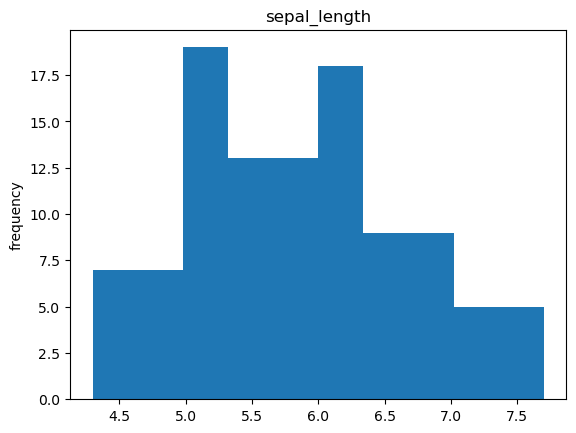

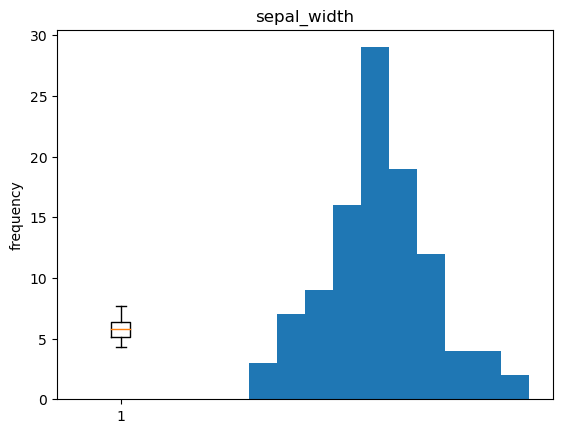

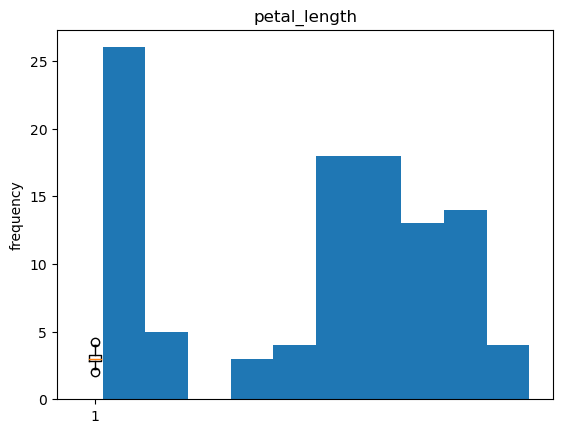

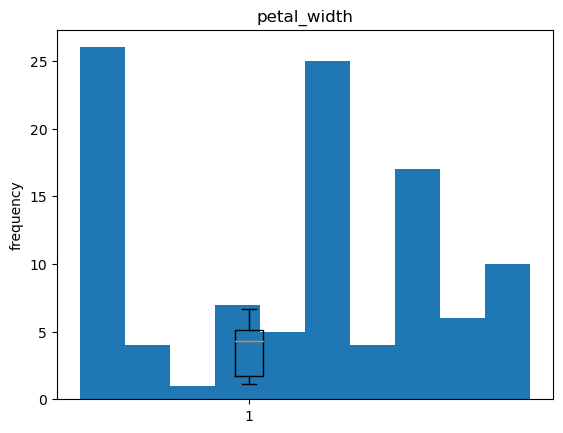

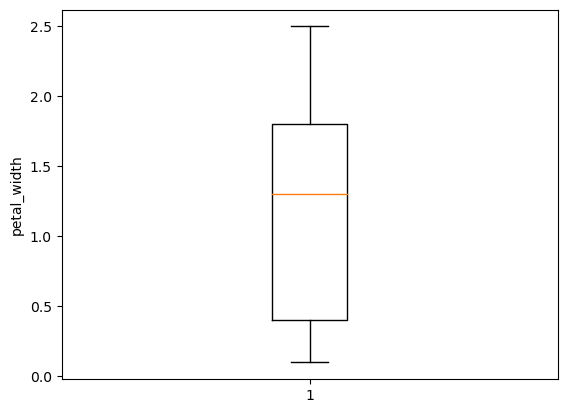

In [6]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()

    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show

    train[col].describe()

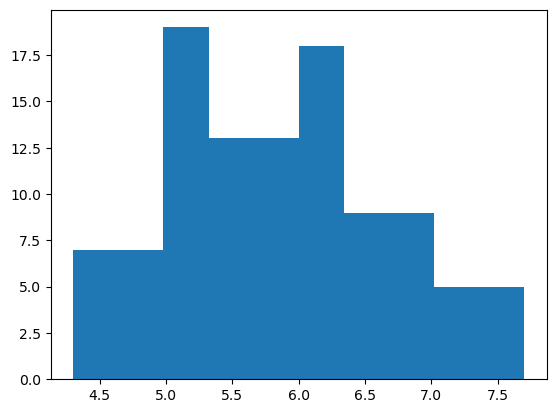

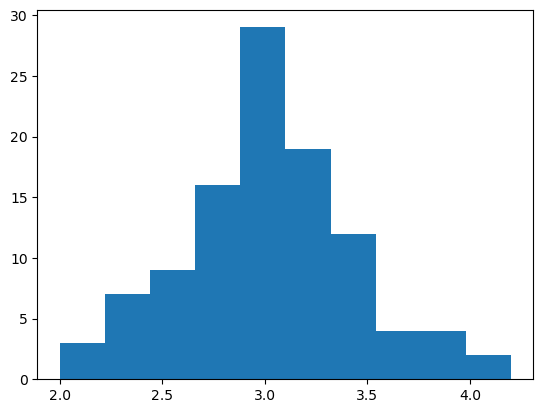

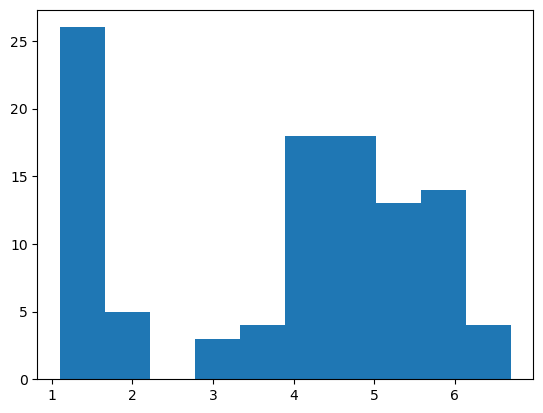

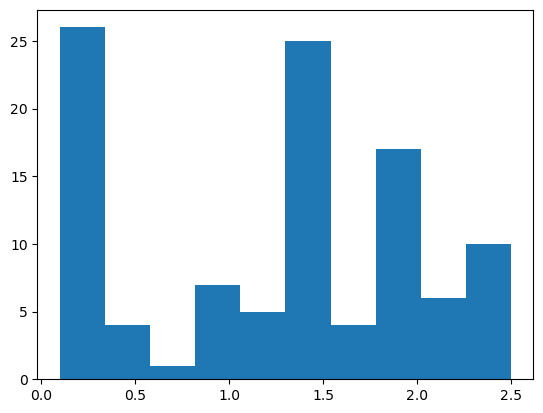

In [7]:
plt.hist(train.sepal_length)
plt.show()
plt.hist(train.sepal_width)
plt.show()   
plt.hist(train.petal_length)
plt.show()
plt.hist(train.petal_width)
plt.show()

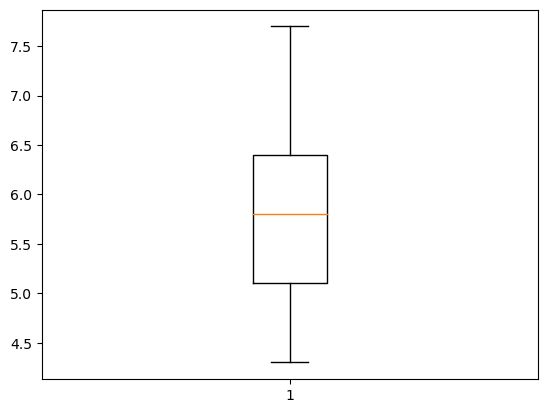

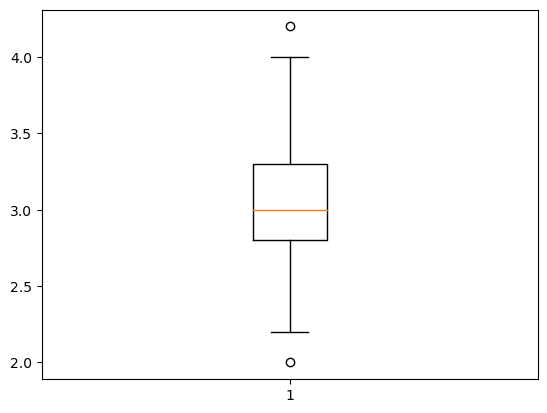

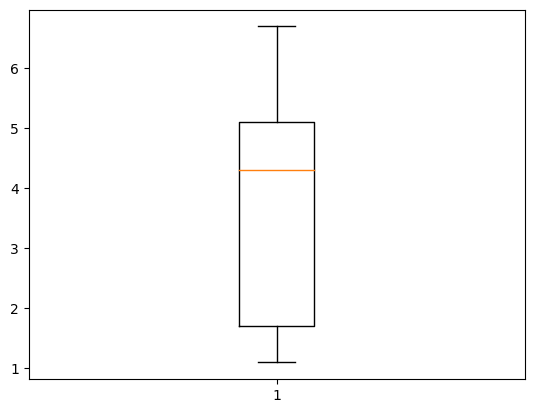

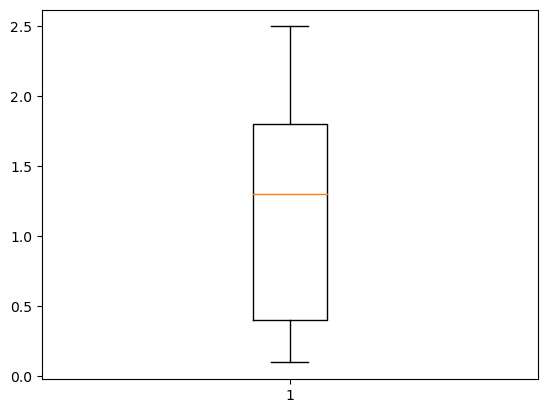

In [8]:
plt.boxplot(train.sepal_length)
plt.show()
plt.boxplot(train.sepal_width)
plt.show()   
plt.boxplot(train.petal_length)
plt.show()
plt.boxplot(train.petal_width)
plt.show()

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [9]:
df_iris=pd.DataFrame(train, columns=['species_name','species_id'])
df_iris.value_counts()

Series([], dtype: int64)

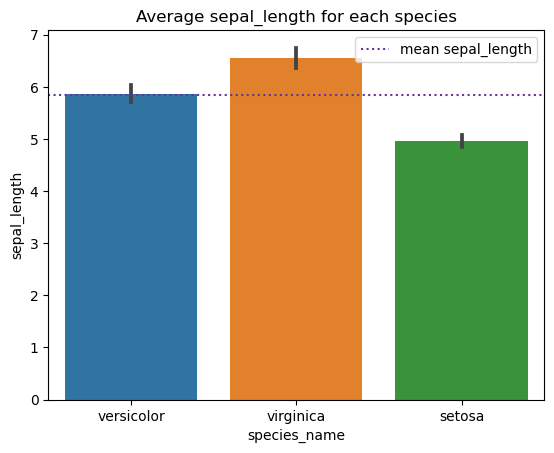

In [10]:
col = 'sepal_length'
sns.barplot(x = 'species_name', y = col, data =train)
plt.title(f'Average {col} for each species')
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label = f'mean {col}',color = 'rebeccapurple' , linestyle = 'dotted')
plt.legend()
plt.show()

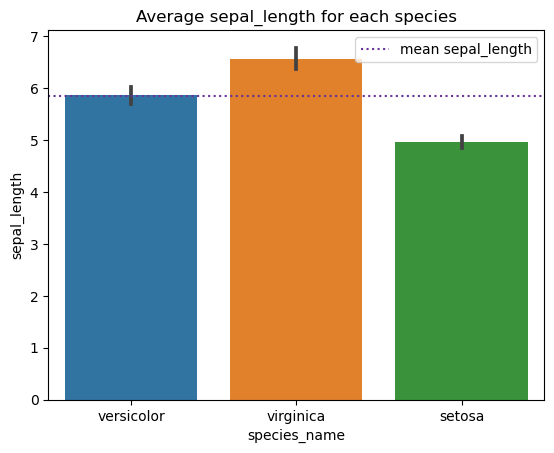

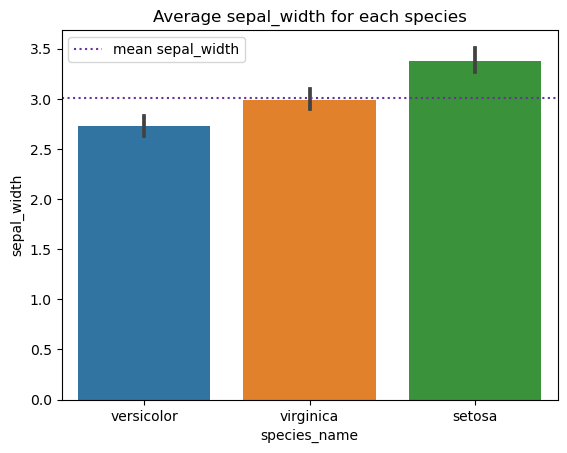

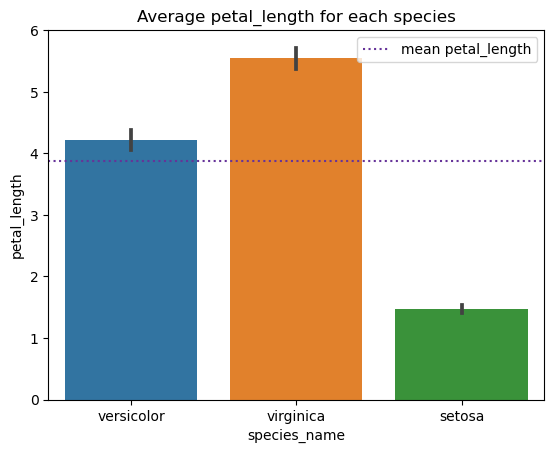

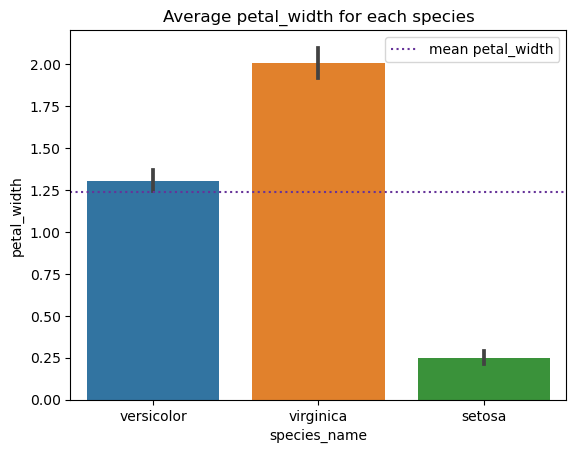

In [11]:

for col in num_cols:
    sns.barplot(x = 'species_name', y = col, data =train)
    plt.title(f'Average {col} for each species')
    overall_mean = train[col].mean()
    plt.axhline(overall_mean, label = f'mean {col}',color = 'rebeccapurple' , linestyle = 'dotted')
    plt.legend()
    plt.show()

Document takeaways & any actions.

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

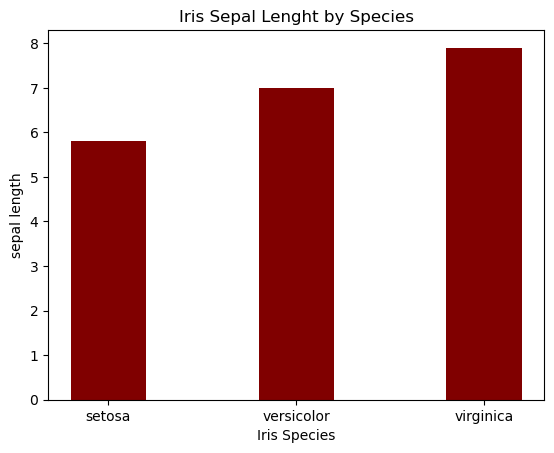

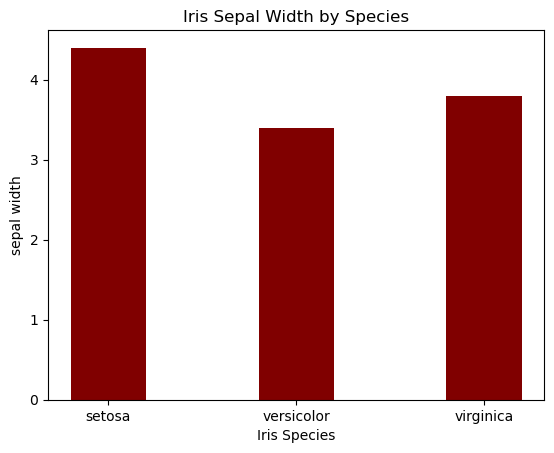

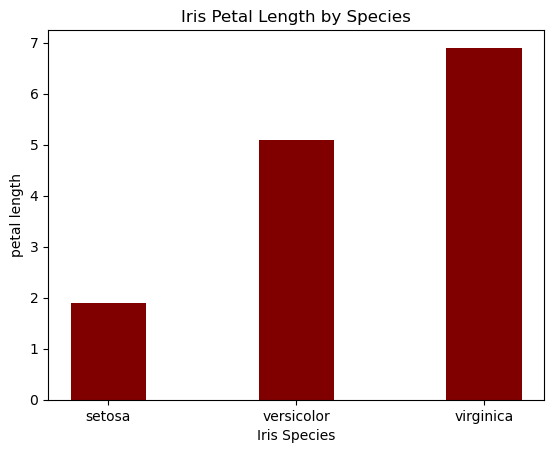

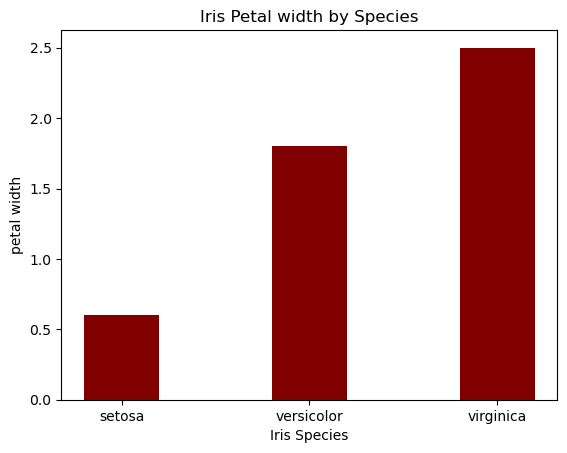

In [12]:
plt.bar(iris_df.species_name, iris_df.sepal_length, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("sepal length")
plt.title("Iris Sepal Lenght by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.sepal_width, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("sepal width")
plt.title("Iris Sepal Width by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.petal_length, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("petal length")
plt.title("Iris Petal Length by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.petal_width, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("petal width")
plt.title("Iris Petal width by Species")
plt.show()

For each measurement type, compute the descriptive statistics for each species.

In [13]:
df_iris_num=pd.DataFrame(iris_df, columns=['petal_length','petal_width', 'sepal_length','sepal_width','species_name'])
df_iris_num.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,3.758000,1.199333,5.843333,3.057333
std,1.765298,0.762238,0.828066,0.435866
min,1.000000,0.100000,4.300000,2.000000
25%,1.600000,0.300000,5.100000,2.800000
50%,4.350000,1.300000,5.800000,3.000000
75%,5.100000,1.800000,6.400000,3.300000
max,6.900000,2.500000,7.900000,4.400000


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [14]:
vir_iris = df_iris_num[df_iris_num.species_name == 'virginica']
vir_iris

ver_iris = df_iris_num[df_iris_num.species_name == 'versicolor']
ver_iris

print(stats.mannwhitneyu(vir_iris.petal_width, ver_iris.petal_width, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.petal_length, ver_iris.petal_length, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.sepal_width, ver_iris.sepal_width, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.sepal_length, ver_iris.sepal_length, alternative='two-sided'))



MannwhitneyuResult(statistic=2451.0, pvalue=9.698045444914185e-17)
MannwhitneyuResult(statistic=2455.5, pvalue=9.133544727668256e-17)
MannwhitneyuResult(statistic=1659.0, pvalue=0.004572142206879863)
MannwhitneyuResult(statistic=1974.0, pvalue=5.869006410664197e-07)


Document takeaways & any actions.

across all measurment stats there is a significant difference between versicolor and virginica

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_40376/2089927331.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris12 = ver_iris.append(vir_iris)


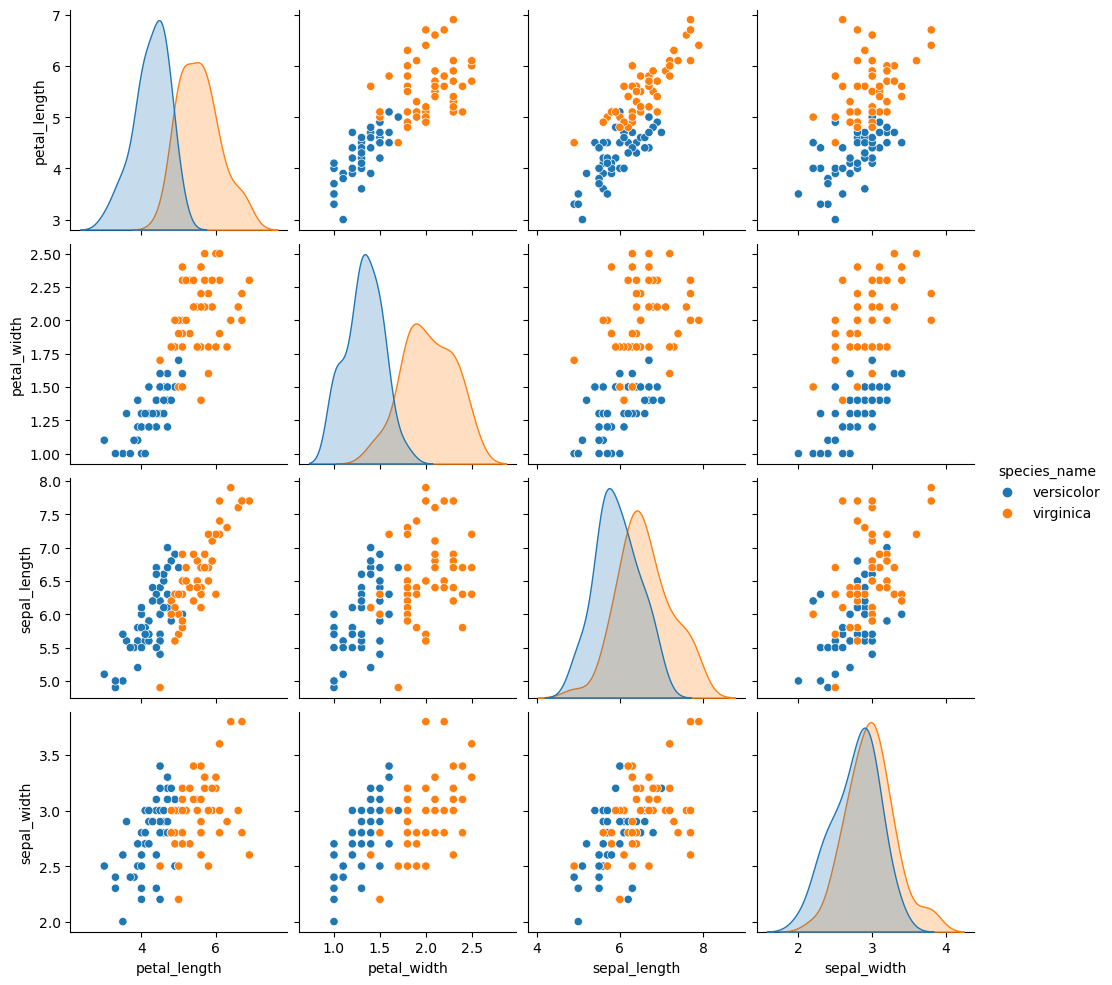

In [15]:
iris12 = ver_iris.append(vir_iris)
sns.pairplot(iris12, hue="species_name")

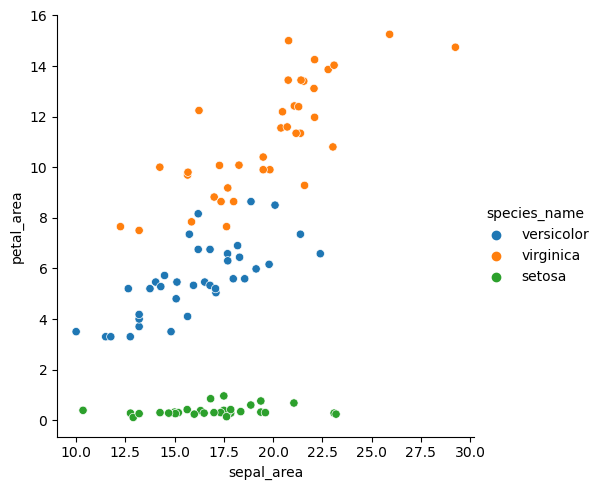

In [16]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

sns.relplot(x = 'sepal_area', y= 'petal_area', data = train, hue = 'species_name')

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

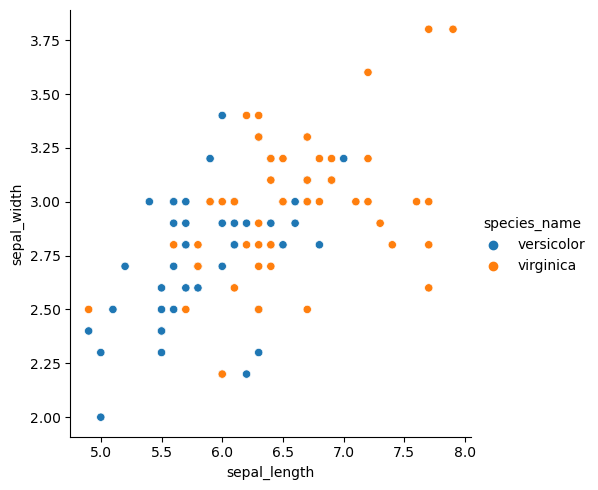

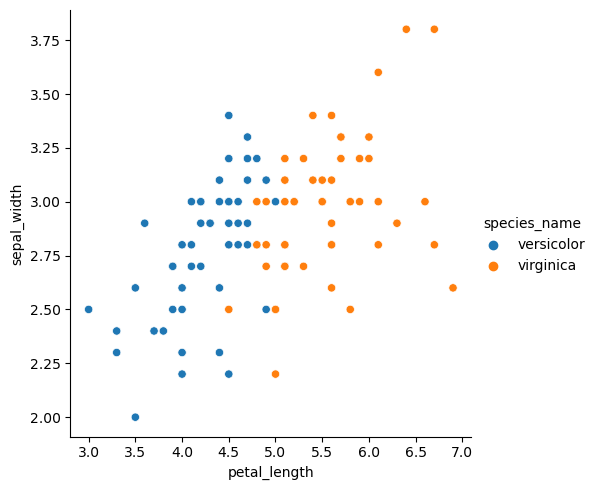

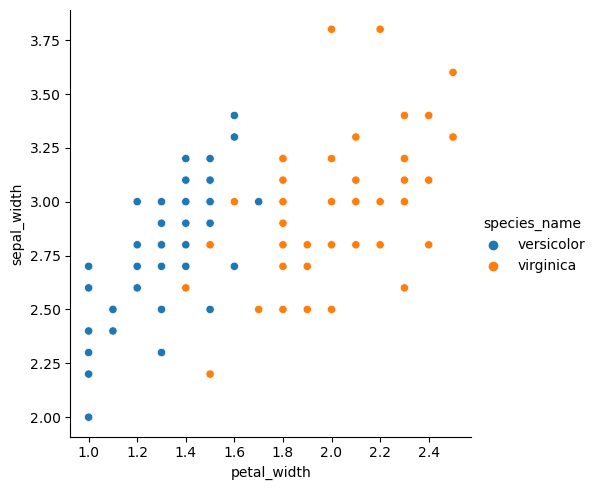

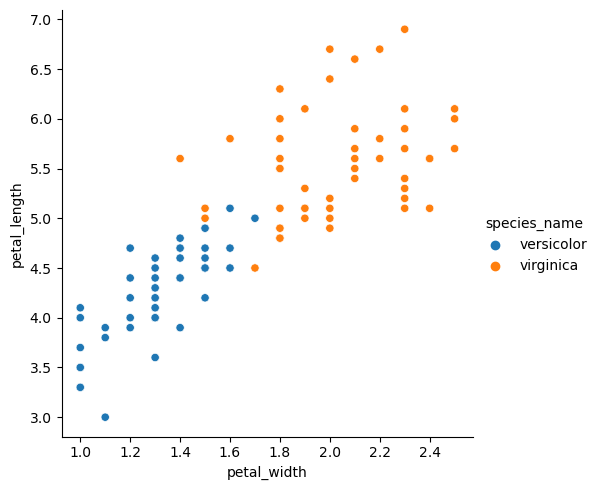

In [17]:
sns.relplot(data=iris12, x="sepal_length", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_length", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_width", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_width", y="petal_length", hue="species_name")
plt.show()

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [18]:
train = train.drop(columns = 'sepal_area')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categori

<AxesSubplot:xlabel='measure', ylabel='values'>

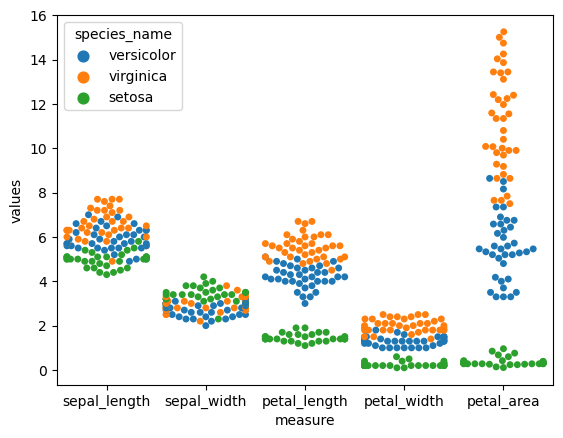

In [19]:
melted = train.melt(id_vars = ['species_name'], var_name = 'measure', value_name = 'values')

sns.swarmplot(x = 'measure', y = 'values', data = melted, hue = "species_name")

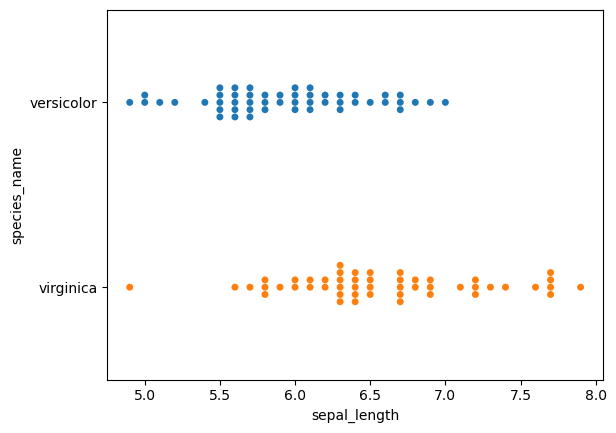

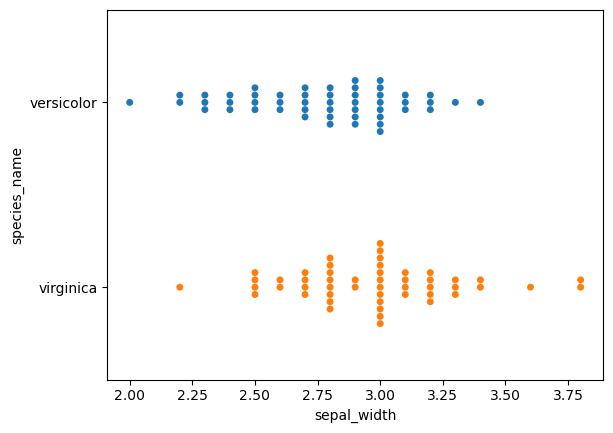

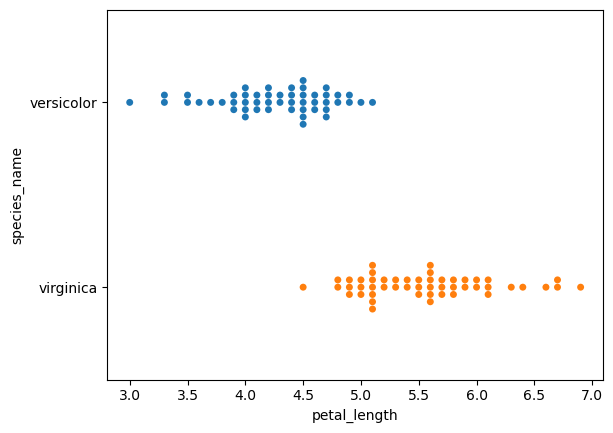

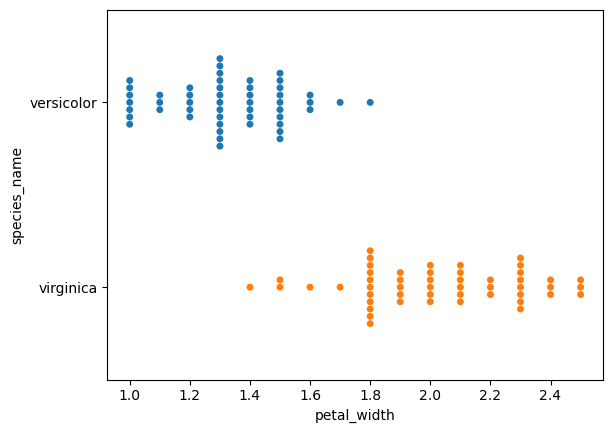

In [20]:
sns.swarmplot(data=iris12, x="sepal_length", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="sepal_width", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="petal_length", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="petal_width", y="species_name")
plt.show()

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

is sepal width significantly different across virginica and versicolor?  
h0: there is no significant difference  
hA: there is a significant difference  

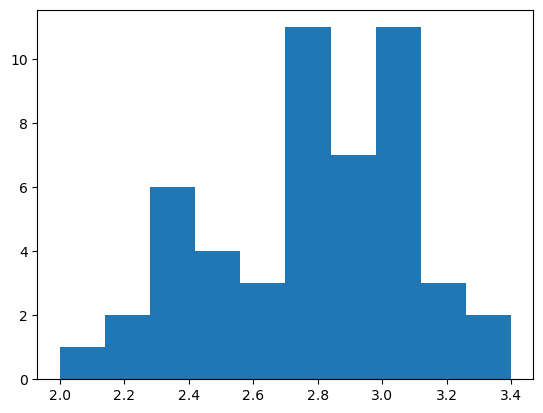

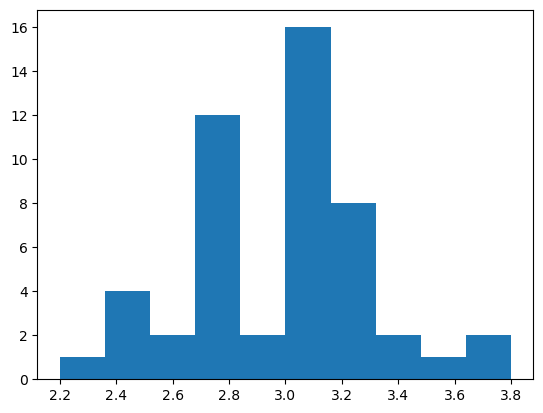

In [21]:
plt.hist(ver_iris.sepal_width)
plt.show()
plt.hist(vir_iris.sepal_width)
plt.show()

In [22]:
stats.ttest_ind(ver_iris.sepal_width, vir_iris.sepal_width)

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

our null hypothesis is rejected by the low P

Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable

Determine if certain columns should be dropped

In [23]:
titanic_df = acquire.get_titanic_data()

In [25]:


prepare.clean_titanic(titanic_df)

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [26]:
titan_train,titan_val,titan_test = prepare.train_val_test(titanic_df)
titan_train.describe()



,Unnamed: 0,survived,pclass,sibsp,parch,fare,alone
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,445.581059,0.370787,2.341894,0.576244,0.386838,31.840730,0.597111
std,260.012799,0.483404,0.819945,1.216267,0.807692,51.027372,0.490873
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,215.000000,0.000000,2.000000,0.000000,0.000000,7.925000,0.000000
50%,453.000000,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000
75%,674.500000,1.000000,3.000000,1.000000,0.000000,30.750000,1.000000
max,890.000000,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000


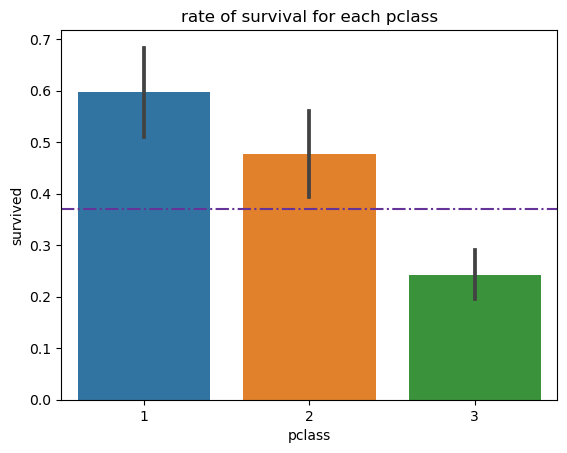

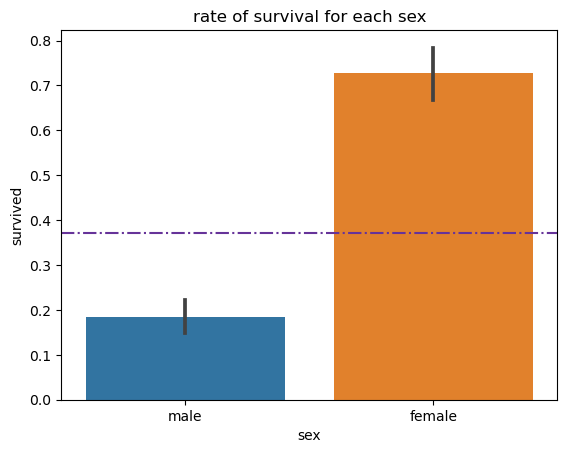

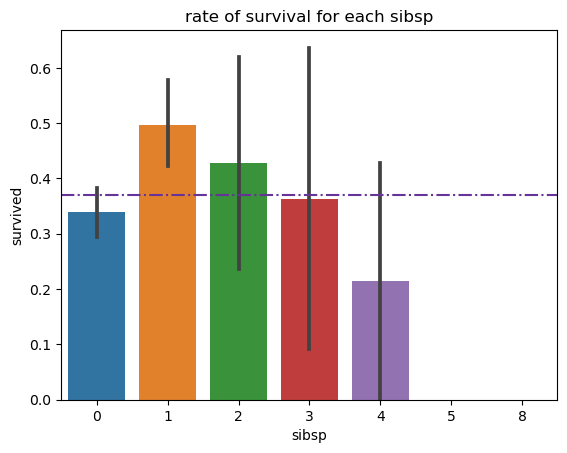

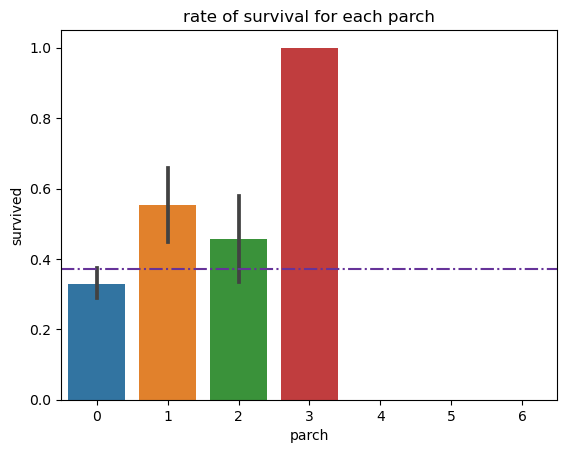

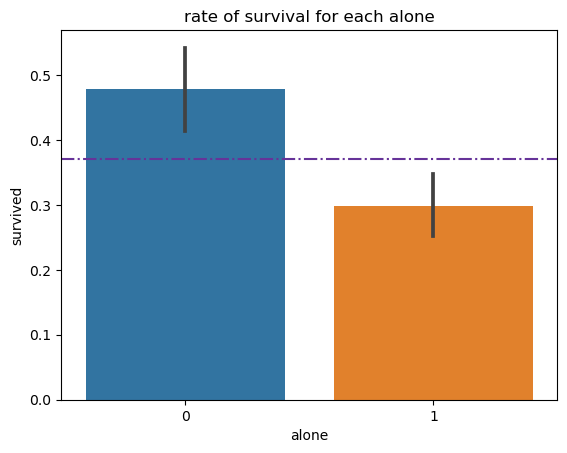

In [36]:
cat_vars = ['pclass', 'sex', 'sibsp', 'parch', 'alone']

#plot one variable with survived
survival_rate = titan_train.survived.mean()
#col = 'pclass'


for col in cat_vars:
    plt.title(f'rate of survival for each {col}')
    sns.barplot(x = col, y ='survived', data = titan_train )
    plt.axhline(survival_rate, color = 'rebeccapurple', linestyle = '-.')
    plt.show()

Determine if it would be valuable to bin some numeric columns

In [ ]:
#age binning and fare binning could be helpful
titanic_df.loc[titanic_df.age.between(0,18, 'both'), 'age_group'] = 'child'
titanic_df.loc[titanic_df.age.between(18, 30, 'right'), 'age_group'] = 'young adult'
titanic_df.loc[titanic_df.age.between(30,50, 'right'), 'age_group'] = 'adult'
titanic_df.loc[titanic_df.age.between(50,90, 'right'), 'age_group'] = 'elderly'

titanic_df.dropna()

Determine if it would be valuable to combine multiple columns into one.

In [ ]:
#no?

Does it make sense to combine any features?

In [ ]:
#no?

Do you find any surprises?

In [ ]:
#no?

Document any and all findings and takeaways in your notebook using markdown.

In [ ]:
#had a higher likelihood of survival (as indicated by viz)
# first class 
# women
# traveling along
# sib or spouse

<AxesSubplot:xlabel='pclass', ylabel='survived'>

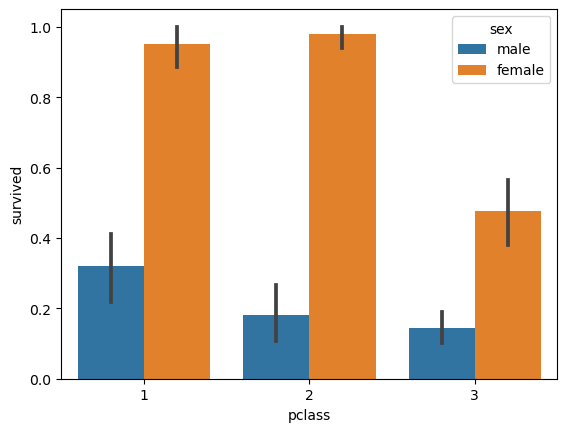

In [38]:
#does class impact survival rate of males?

sns.barplot (x = 'pclass', y = 'survived', data = titan_train, hue = 'sex')

#woman who didn't survive appear to be largely from 3rd class
#if a male survived, he was likely in first classb

<AxesSubplot:xlabel='alone', ylabel='survived'>

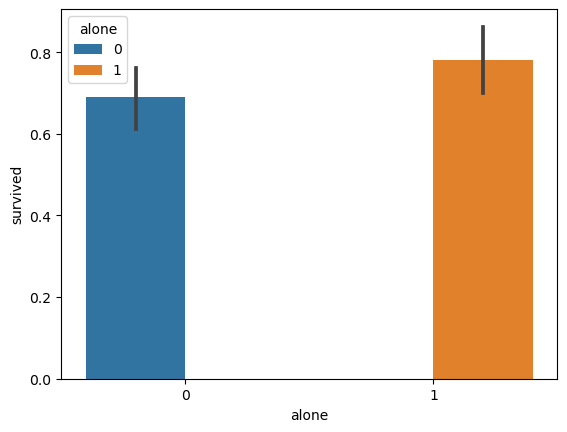

In [39]:
#of females in 3rd class, is their survival effected by travelling alone

sns.barplot(x = 'alone', y ='survived', data = titan_train [ titan_train.sex == 'female'], hue = 'alone')

#it appears that women in 3rd are more liikely to survive 

In [43]:
alpha = 0.05

#h_0: survival rate of alone females in 3rd class aline is < = survival rate than not alone female 3rd class
#h_a: survival rate of alone females in 3rd class aline is > survival rate than not alone female 3rd class
sample = titan_train[(titan_train['pclass'] == 3) & (titan_train['sex'] == 'female')]
observed = pd.crosstab(sample.alone, sample.survived)
chi2, p , df, expected = stats.chi2_contingency(observed)

p < alpha


False

Part III
Explore your telco data to discover drivers of churn

In [ ]:
telco_df = acquire.get_telco_data()
telco_df.describe()

Determine if certain columns should be dropped

In [ ]:
telco_df.drop([telco_df.columns[0], 'payment_type_id','internet_service_type_id','contract_type_id'], axis = 1, inplace = True)

Determine if it would be valuable to bin some numeric columns

In [ ]:
#binning tenure could be helpful
telco_df.loc[telco_df.tenure.between(0,24, 'both'), 'tenure_group'] = 'short tenure'
telco_df.loc[telco_df.tenure.between(24, 48, 'right'), 'tenure_group'] = 'two_four'
telco_df.loc[telco_df.tenure.between(48,72, 'right'), 'tenure_group'] = 'four_three'
telco_df['total_charges'] = (telco_df.tenure) * (telco_df.monthly_charges)
telco_df.describe()

In [ ]:
telco_df.info()

Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

In [ ]:
sns.relplot(data=telco_df, x="tenure", y="total_charges", hue="churn")
plt.show()

Does it make sense to combine any features?

In [ ]:
#yes; monthly charges and tenure to make 'total_charges'

Do you find any surprises?

In [ ]:
#surprised by clustering at low tenure

Document any and all findings and takeaways in your notebook using markdown.